# Advanced Python Module 2: More numpy and pendulum simulation

Copyright &copy; 2021, Undergraduate Lab at Berkeley

In this module, we'll review a bit more numpy, and finish the core part of the pendulum simulation!

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import imageio
import matplotlib.pyplot as plt
import tqdm
import tests

## Practice with multidimensional arrays

Handling arrays with several dimensions can be one of the most unintuitive aspects of working with numpy, so let's run through a quick example. One of the common applications of multidimensional arrays is to represent color images. The data underlying a color image is a number of 2D arrays, each one representing the image along a specific "channel" that has the component of just one base color.

By running the code below, you can get a picture of Chelsea the cat:

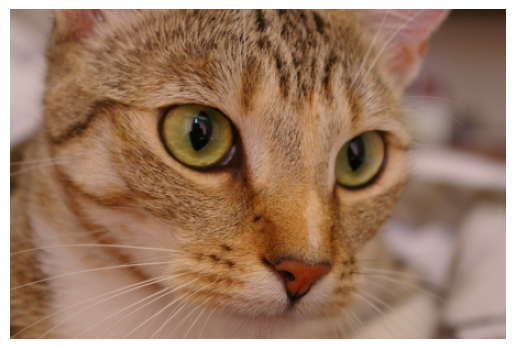

In [2]:
chelsea = imageio.imread("imageio:chelsea.png")
plt.imshow(chelsea)
_ = plt.axis("off")
plt.show()

This picture is actually just a 3D array, with one dimension for width, one for height, and one for the color channels.

In [3]:
chelsea

Array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]

In [4]:
chelsea.shape

(300, 451, 3)

By isolating just one of the three channels along axis 2 (remember, these are zero-indexed, so axis 2 is what we would call the third dimension) we can get just the red, blue, or green component. To do this, we take "full slices" along the first and second axes, by putting in just a colon to represent choosing everything along that dimension. For a simpler example:

In [5]:
a = np.arange(12).reshape((3,4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
a[1,2] # choose row 1, column 2

6

In [7]:
a[1,:] # choose row 1, every column

array([4, 5, 6, 7])

In [8]:
a[:,2] # choose every row, column 2

array([ 2,  6, 10])

Applying this to Chelsea, we get this:

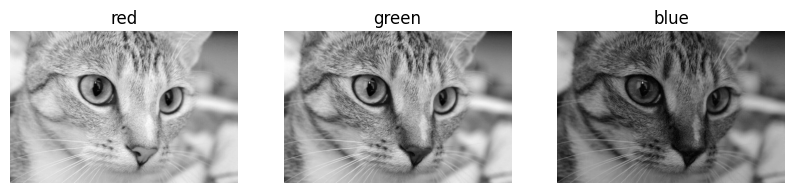

In [9]:
colors = ['red', 'green', 'blue']
fig, axs = plt.subplots(1,3, figsize=(10,10))
for i in range(3):
    axs[i].imshow(chelsea[:,:,i], cmap='gray')
    axs[i].set_title(colors[i])
    axs[i].axis("off")
plt.show()

If we want to see these in their channel colors instead of in grayscale, we can set the other two channels to 0 and show the resulting full image:

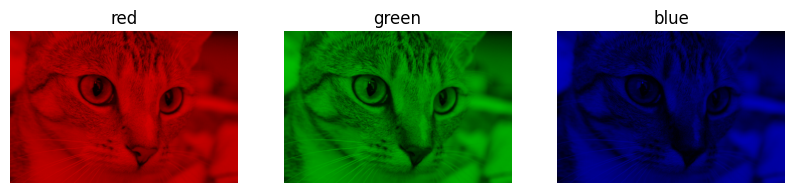

In [10]:
colors = ['red', 'green', 'blue']
fig, axs = plt.subplots(1,3, figsize=(10,10))
for i in range(3):
    chelsea_copy = np.zeros_like(chelsea)
    chelsea_copy[:,:,i] = chelsea[:,:,i]
    axs[i].imshow(chelsea_copy)
    axs[i].set_title(colors[i])
    axs[i].axis("off")
plt.show()

# Question 1 (10 pts)

You might notice that each of the grayscale images above looks subtly different - it seems like picking just one channel isn't representative of what a black-and-white image of Chelsea *should* look like, and instead we need a combination of them. This is actually a standard formula that we can find in the [imageio documentation](https://readthedocs.org/projects/imageio/downloads/pdf/latest/). 

An important skill in programming is reading through documents like this to find the one formula or fact that you need! For this problem, go to page 50 of the imageio documentation and find the combination of R, G, and B that we should use, then implement it in the function below.

In [23]:
def rgb_to_grayscale(img):
    """
    Converts an RGB image to grayscale according to the imageio formula.
    
    Parameters
    ----------
    img : np.ndarray, (M, N, 3)
    The image, with three channels for R, G, B along axis 2.
    
    Returns
    -------
    gray : np.ndarray, (M, N)
    The grayscaled image.
    """
    
    #TODO

Now, if we look at the color and grayscaled pictures side by side, they should look a lot more similar than the single-channel versions!

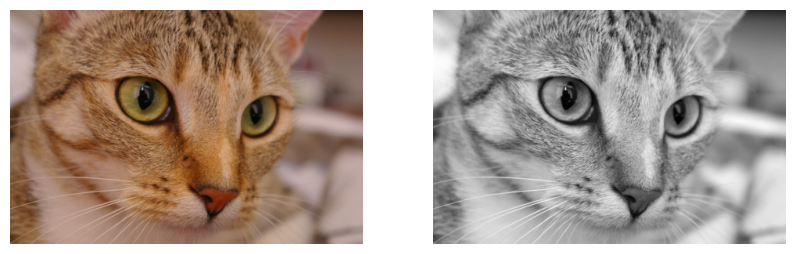

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(chelsea)
_ = axs[0].axis("off")
axs[1].imshow(rgb_to_grayscale(chelsea), cmap='gray')
_ = axs[1].axis("off")
plt.show()

# Question 2 (20 pts)

With a bit more practice both with numpy arrays and with learning documentation, let's come back to the pendulum problem! In the last module, we computed the acceleration for a single pendulum. This time, we'll do the same for the double pendulum. The physics of this is a lot more complicated, so we've provided a [reference](http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf) that does the full derivation.

Understanding the full derivation isn't important (and extracting only the important parts of a paper without necessarily knowing everything else that's going on is a useful research skill!) The only part you should need is the two equations right at the end, numbered (69) and (70), and it'll take some algebraic manipulation to rewrite them in the form you'll need for this function.

*Hint*: it might help to define some intermediate variables for quantities like $\sin(\theta_2 - \theta_1)$ that come up a few times.

In [13]:
def get_accel_2(angles, vels, lengths, masses):
    '''
    Finds the accelerations of each mass as a function of the system state, for the two-pendulum case.

    Arguments
    ---------
    angles : np.ndarray, (2,)
    The angle of each pendulum arm with respect to the normal.

    lengths : np.ndarray, (2,)
    The length of each pendulum arm.

    masses : np.ndarray, (2,)
    The mass of each pendulum weight.

    vels : np.ndarray, (2,)
    The theta-dots of each pendulum arm.

    Returns
    -------
    accels : np.ndarray, (2,)
    The net acceleration, in the theta direction, on each mass.
    '''
    pi = np.pi
    g = 9.81
    #TODO

In [14]:
tests.run('test_accel2', get_accel_2)

**<span style="color: green;">Passed // 2021-10-02 15:39:36.637592</span>**

# Question 3 (10 pts)

Now that we know how to get accelerations, let's use them to move our simulation forward in time! This works simply by the usual kinematic update rules:

\begin{align*}
    v(t + \Delta t) &= v(t) + a(t) \Delta t\\
    x(t + \Delta t) &= x(t) + v(t) \Delta t
\end{align*}

Fill in the function to do this below.

*Hint*: remember angles can only be in the range $[0, 2\pi)$, and think about which common arithmetic operator will help us ensure we bring our angle back into this range.

*Numerical note*: if you've had any experience with numerical solutions to differential equations, you might know that the method we're using here (forward Euler integration) accumulates error over time, and that there are other methods to get more accurate solutions to differential equations like this one. However, we'll stick with this method just because it's closest to the physics, and the small timestep means that even with this flaw, our simulation will still let us get some good results.

In [15]:
def step(angles, vels, accels, dt=1e-3):
    '''
    Advances the system through a timestep of 'dt' seconds:
    takes in the state at some time t and the change, returns the state at time t + dt.

    Arguments
    ---------
    angles, vels, accels : np.ndarray, (N,)
    The angles, velocities, accelerations of the pendulums.

    dt : scalar, optional
    The timestep variable.

    Returns
    -------
    angles, vels : np.ndarray, (N,)
    The new state of the system.
    '''
    #TODO

In [16]:
tests.run('test_step', step)

**<span style="color: green;">Passed // 2021-10-02 15:39:36.839821</span>**

We're ready to finish up the simulation! We'll need the two functions you wrote for the last module, `positions` and `get_accel_1`, so copy and paste them into the Python cells below.

Copying and pasting code like this seems tedious and inefficient, and can lead to errors once we scale up to bigger programs. It isn't a big deal with two functions, but once you've written dozens or hundreds, this approach becomes a lot more impractical. In the next module, we'll reformat the work you've done so far into a better workflow for big projects.

In [17]:
# your positions function here
def positions(angles, lengths):
    '''
    Finds the positions in (x, y) space of the set of weights.
    Assumes the fixed point is (0, 0) and +y is up.

    Arguments
    ---------
    angles : np.ndarray, (N,)
    The angle of each pendulum with respect to the normal, in radians.

    lengths : np.ndarray, (N,)
    The length of each pendulum, in meters.

    Returns
    -------
    positions : np.ndarray, (N, 2)
    The (x, y) position of each mass.
    '''
    N = len(angles)
    pos = np.zeros((N, 2))
    for i, (a, l) in enumerate(zip(angles, lengths)):
        if i == 0:
            pos[i] = l * np.array([np.sin(a), -np.cos(a)])
        else:
            pos[i] = pos[i - 1] + l * np.array([np.sin(a), -np.cos(a)])
    
    return pos

In [18]:
# your get_accel_1 function here
g = 9.81 # m / s^2

def get_accel_1(angles, vels, lengths, masses):
    '''
    Finds the acceleration of the single pendulum as a function of the system state.
    NOTE: all the arguments are single-element lists, to match the signature of accel_2 and accel_N.

    Arguments
    ---------
    angles : np.ndarray, (1,)
    The angle of the pendulum arm with respect to the normal.

    lengths : np.ndarray, (1,)
    The length of the pendulum arm.

    masses : np.ndarray, (1,)
    The mass of the pendulum weight.

    vels : np.ndarray, (1,)
    The theta-dot of the pendulum arm.

    Returns
    -------
    accels : np.ndarray, (1,)
    The net acceleration, in the theta direction, on the mass.
    '''
    return -g * np.sin(angles) / lengths


## Question 4

We'll need one more function to tie together everything we've written so far! In this function, we'll start with an initial position, and push our simulation through many timesteps, by repeatedly finding the acceleration values and updating the velocity and position based on that. Fill in the cell below to do this!

In [19]:
def simulate(angles_init, lengths, masses, dt=1e-3, num_steps=2000):
    '''
    Runs the simulation for 'num_steps' steps of time 'dt'.

    Arguments
    ---------
    angles_init : np.ndarray, (N,)
    The initial angles of the N pendulum components.

    lengths : np.ndarray, (N,)
    The length of each pendulum arm.

    masses : np.ndarray, (N,)
    The mass of each pendulum weight.

    dt : scalar, optional
    The timestep variable.

    num_steps : int, optional
    The number of timesteps over which to run the simulation.

    Returns
    -------
    time : np.ndarray, (num_steps)
    A time axis to accompany the positions.

    pos : np.ndarray, (num_steps, N, 2)
    The (x, y) position of each pendulum at each timestep.
    '''
    N = len(angles_init)
    get_accel = {1 : get_accel_1, 2 : get_accel_2}.get(N)
    pos = np.zeros((num_steps, N, 2))
    vel = np.zeros((num_steps, N))
    ang = np.zeros((num_steps, N))
    current_ang = angles_init
    current_vel = np.zeros_like(angles_init)
    for i in tqdm.trange(num_steps):
        ang[i] = current_ang
        pos[i] = positions(current_ang, lengths)
        vel[i] = current_vel
        accel = get_accel(current_ang, current_vel, lengths, masses)
        current_ang, current_vel = step(current_ang, current_vel, accel, dt=dt)

    return np.arange(start=0, stop=(dt * num_steps), step=dt), pos

In [20]:
tests.run('test_simulate', simulate)

100%|██████████| 50/50 [00:00<00:00, 5563.03it/s]


**<span style="color: green;">Passed // 2021-10-02 15:39:37.067072</span>**

Now that we're done, let's take a look at our results! Both cells below should run in about 5 seconds.

100%|██████████| 50000/50000 [00:02<00:00, 23127.25it/s]


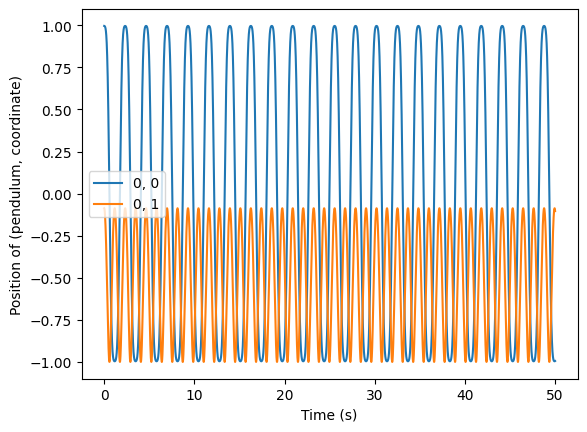

In [21]:
# one-pendulum case
N = 1
angles_init = np.pi / 180 * np.array([85])
lengths = np.array([1])
masses = np.array([0.1])

time, pos = simulate(angles_init, lengths, masses, num_steps=50000)
for i in range(N):
    for j in range(2):
        plt.plot(time, pos[:, i, j], label="{0}, {1}".format(i,j))

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position of (pendulum, coordinate)")
plt.show()

100%|██████████| 50000/50000 [00:05<00:00, 8368.97it/s] 


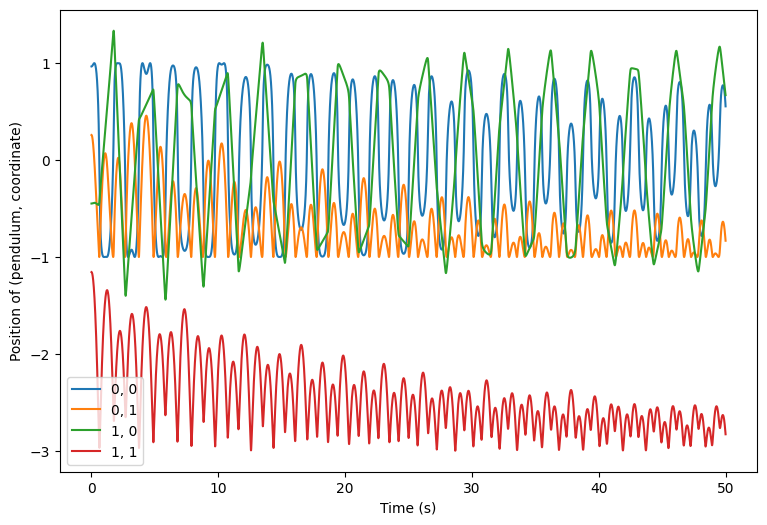

In [22]:
# two-pendulum case
N = 2
angles_init = np.pi / 180 * np.array([105, -45])
lengths = np.array([1, 2])
masses = np.array([0.1, 0.5])


time, pos = simulate(angles_init, lengths, masses, num_steps=50000)
for i in range(N):
    for j in range(2):
        plt.plot(time, pos[:, i, j], label="{0}, {1}".format(i,j))

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position of (pendulum, coordinate)")
fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.show()

Even if these look reasonable (some sort of oscillation that's roughly correlated), it's not that easy to understand what's physically happening yet. Ideally, we want to see how the pendulum is actually moving in space. In the next module, we'll explore some plotting and animation tools to help us do this, as well as shifting our simulation over to `.py` files so that it's easier to maintain!

## Conclusion

In this module, we

- explored handling multidimensional arrays
- learned about how to read documentation and papers for relevant facts
- wrote the core of our pendulum simulation
- started to see some pendulum simulation results!